In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp

In [2]:
years = np.array([1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
points = np.array([76212168, 92228496, 106021537, 123202624, 132164569,  151325798, 179323175,  203302031,  226542199])

In [3]:
def create_matrix():
    matrix = np.zeros((9,9))

    for i in range(len(years)):
        for j in range(len(years)):
            matrix[i][j] = (years[i] ** j)

    return matrix

In [4]:
def horner(L, x):
    i = len(L) - 1
    result = L[i]
    while i > 0:
        i = i - 1
        result = result*x + L[i]
        
    return result

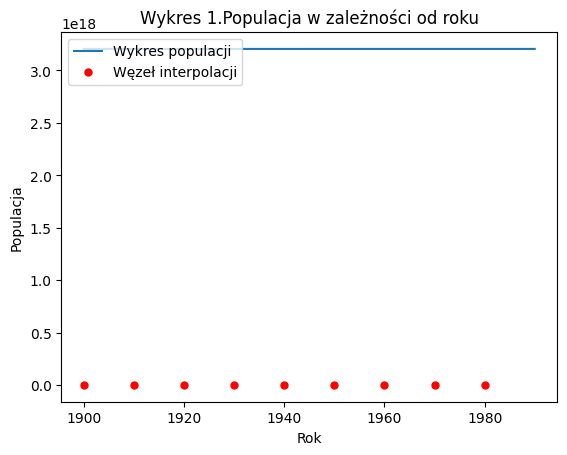

In [5]:
def approximate():
    matrix = create_matrix()
    cooeficient_vector = np.dot(np.linalg.inv(matrix), matrix)

    new_years = np.arange(1900, 1991, 1)
    new_points = [horner(cooeficient_vector, new_years[i]) for i in range(len(new_years))]

    plt.plot(new_years, new_points, label="Wykres populacji")
    plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
    plt.legend(loc="upper left")

    plt.title("Wykres 1.Populacja w zależności od roku")
    plt.xlabel("Rok")
    plt.ylabel("Populacja")
    plt.show()

approximate()